Extracting Dataset using Kaggle API

In [ ]:
# installing the Kaggle library
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [ ]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 98% 801M/814M [00:11<00:00, 106MB/s]
100% 814M/814M [00:11<00:00, 72.2MB/s]


In [ ]:
!ls

dogs-vs-cats-redux-kernels-edition.zip	kaggle.json  sample_data


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats-redux-kernels-edition.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.1419.jpg', 'dog.8466.jpg', 'cat.10086.jpg', 'cat.11689.jpg', 'dog.2099.jpg', 'dog.11797.jpg', 'cat.10964.jpg', 'cat.8543.jpg', 'cat.8581.jpg', 'dog.7811.jpg', 'dog.6838.jpg', 'dog.7930.jpg', 'cat.3751.jpg', 'cat.9541.jpg', 'cat.1763.jpg', 'cat.8917.jpg', 'dog.9184.jpg', 'cat.4611.jpg', 'dog.2252.jpg', 'cat.1725.jpg', 'cat.9432.jpg', 'dog.4789.jpg', 'dog.958.jpg', 'dog.11111.jpg', 'cat.6331.jpg', 'dog.11748.jpg', 'cat.11909.jpg', 'dog.10305.jpg', 'dog.2232.jpg', 'dog.6839.jpg', 'dog.4172.jpg', 'cat.5856.jpg', 'cat.6334.jpg', 'cat.9877.jpg', 'dog.6436.jpg', 'cat.6764.jpg', 'cat.6383.jpg', 'dog.6371.jpg', 'dog.10237.jpg', 'cat.9409.jpg', 'cat.3505.jpg', 'cat.7320.jpg', 'cat.7755.jpg', 'dog.4868.jpg', 'cat.406.jpg', 'cat.7257.jpg', 'dog.6400.jpg', 'cat.10232.jpg', 'cat.2422.jpg', 'cat.4301.jpg', 'cat.7814.jpg', 'cat.6099.jpg', 'dog.1540.jpg', 'dog.5675.jpg', 'dog.3115.jpg', 'dog.7677.jpg', 'dog.1366.jpg', 'dog.5107.jpg', 'cat.2281.jpg', 'dog.2966.jpg', 'cat.9963.jpg', 'dog.1934.jpg',

Importing the Dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

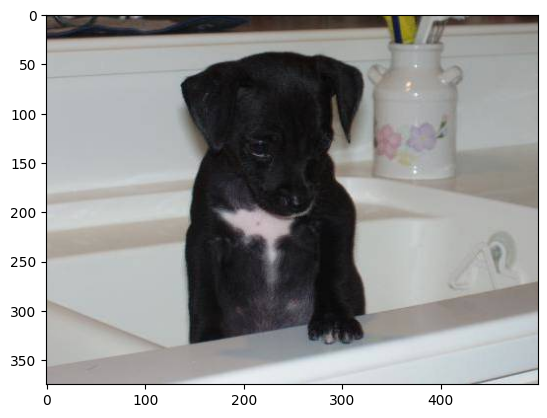

In [ ]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

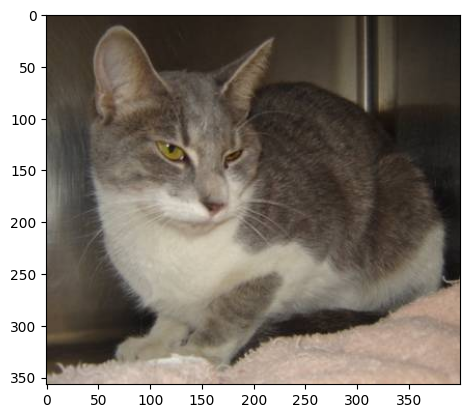

In [ ]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



cat
dog
cat
cat
dog


In [ ]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [ ]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

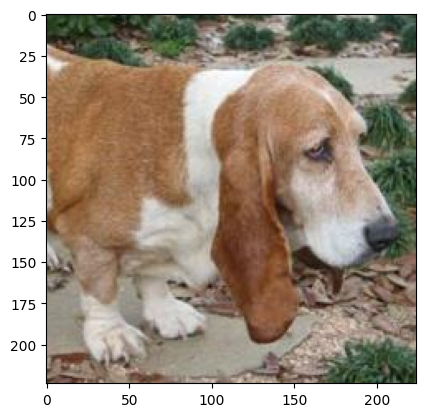

In [ ]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.8466.jpg')
imgplt = plt.imshow(img)
plt.show()

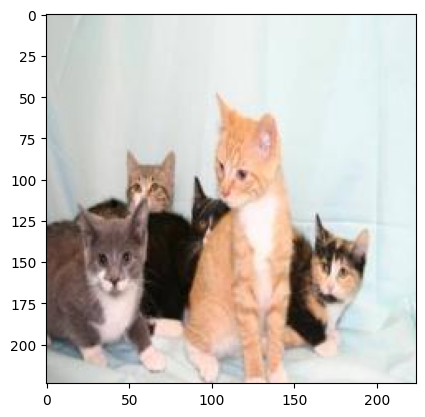

In [ ]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.10086.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [ ]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['cat.1419.jpg', 'dog.8466.jpg', 'cat.10086.jpg', 'cat.11689.jpg', 'dog.2099.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[0, 1, 0, 0, 1]
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1032  968]


Converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[ 21  22  18]
   [ 19  20  16]
   [ 18  19  15]
   ...
   [ 25  29  17]
   [ 25  29  17]
   [ 25  29  17]]

  [[ 21  22  18]
   [ 20  21  17]
   [ 19  20  16]
   ...
   [ 25  29  17]
   [ 25  29  17]
   [ 25  29  17]]

  [[ 22  23  19]
   [ 20  21  17]
   [ 20  21  17]
   ...
   [ 27  31  19]
   [ 27  31  19]
   [ 27  31  19]]

  ...

  [[ 12  18  13]
   [ 13  19  14]
   [ 14  19  17]
   ...
   [ 27  30  28]
   [ 27  30  28]
   [ 27  30  28]]

  [[ 12  18  13]
   [ 13  19  14]
   [ 14  19  17]
   ...
   [ 26  29  27]
   [ 26  29  27]
   [ 26  29  27]]

  [[ 12  18  13]
   [ 12  18  13]
   [ 14  19  17]
   ...
   [ 25  28  26]
   [ 25  28  26]
   [ 25  28  26]]]


 [[[ 25  52  32]
   [ 23  50  30]
   [ 22  49  29]
   ...
   [ 70  89  70]
   [ 54  73  54]
   [ 40  59  40]]

  [[ 43  70  50]
   [ 44  71  51]
   [ 44  71  51]
   ...
   [ 62  81  62]
   [ 53  72  53]
   [ 43  62  43]]

  [[ 46  75  52]
   [ 50  79  56]
   [ 52  81  58]
   ...
   [ 62  79  58]
   [ 55  72  51]
   [ 47  64

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.21568627 0.25490196 0.25490196]
   [0.21960784 0.25882353 0.25882353]
   [0.22352941 0.2627451  0.2627451 ]
   ...
   [0.28235294 0.37254902 0.4745098 ]
   [0.31764706 0.4        0.50588235]
   [0.33333333 0.41568627 0.52156863]]

  [[0.21568627 0.25490196 0.25490196]
   [0.21960784 0.25882353 0.25882353]
   [0.22352941 0.2627451  0.2627451 ]
   ...
   [0.32156863 0.41176471 0.51372549]
   [0.29803922 0.38039216 0.48627451]
   [0.25882353 0.34117647 0.44705882]]

  [[0.21568627 0.25490196 0.25490196]
   [0.21960784 0.25882353 0.25882353]
   [0.22352941 0.2627451  0.2627451 ]
   ...
   [0.32156863 0.41176471 0.51372549]
   [0.2745098  0.35686275 0.4627451 ]
   [0.22352941 0.30588235 0.41176471]]

  ...

  [[0.58823529 0.61568627 0.55686275]
   [0.59215686 0.61960784 0.56078431]
   [0.6        0.62745098 0.56862745]
   ...
   [0.60392157 0.61568627 0.58039216]
   [0.60784314 0.61960784 0.58431373]
   [0.61176471 0.62352941 0.58823529]]

  [[0.58823529 0.61568627 0.55686275]
   [0.5

**Building the Neural Network**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 46s 807ms/step - loss: 0.1812 - acc: 0.9275
Epoch 2/5
50/50 [==============================] - 39s 790ms/step - loss: 0.0690 - acc: 0.9719
Epoch 3/5
50/50 [==============================] - 37s 737ms/step - loss: 0.0497 - acc: 0.9869
Epoch 4/5
50/50 [==============================] - 37s 741ms/step - loss: 0.0430 - acc: 0.9875
Epoch 5/5
50/50 [==============================] - 39s 768ms/step - loss: 0.0343 - acc: 0.9900


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 10s 671ms/step - loss: 0.0869 - acc: 0.9650
Test Loss = 0.08687076717615128
Test Accuracy = 0.9649999737739563


**Predictive System**

Path of the image to be predicted: /content/cat1.jpg


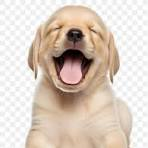

1/1 [==============================] - 0s 34ms/step
[[-5.7660155  3.135326 ]]
1
The image represents a Dog


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat2.jpg


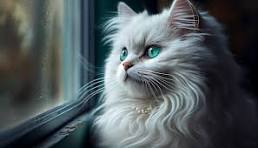

1/1 [==============================] - 0s 35ms/step
[[ 3.5713775 -3.921465 ]]
0
The image represents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')